In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [3]:
all_seasons_df = pd.read_csv('/Users/adalal.04/Desktop/personal work/nba project/all_seasons.csv')
nba_2023_stats_df = pd.read_csv('/Users/adalal.04/Desktop/personal work/nba project/2023_nba_player_stats.csv')

In [4]:
#Extract player names from both datasets
all_seasons_players = all_seasons_df['player_name'].unique()
nba_2023_players = nba_2023_stats_df['Player'].unique()

#Find the common players and filter the all_seasons.csv dataset
common_players = set(all_seasons_players).intersection(set(nba_2023_players))

filtered_all_seasons_df = all_seasons_df[all_seasons_df['player_name'].isin(common_players)].copy()

# Drop duplicates based on the player's name
unique_players_df = filtered_all_seasons_df.drop_duplicates(subset='player_name')

print(unique_players_df)

       Unnamed: 0         player_name team_abbreviation   age  player_height  \
3347         3347       Udonis Haslem               MIA  24.0         203.20   
3448         3448        LeBron James               CLE  19.0         203.20   
3808         3808      Andre Iguodala               PHI  21.0         198.12   
4365         4365          Chris Paul               NOK  21.0         182.88   
4688         4688            Rudy Gay               MEM  20.0         205.74   
...           ...                 ...               ...   ...            ...   
12824       12824     Jaylin Williams               OKC  21.0         205.74   
12826       12826  Jeenathan Williams               POR  24.0         195.58   
12827       12827     Jeff Dowtin Jr.               TOR  26.0         190.50   
12832       12832       Jeremy Sochan               SAS  20.0         203.20   
12840       12840     John Butler Jr.               POR  20.0         213.36   

       player_weight        college cou

In [5]:
# Print column names for the filtered all_seasons dataset
print("Columns in filtered all_seasons dataset:")
print(filtered_all_seasons_df.columns)

# Print column names for the 2023 season dataset
print("\nColumns in 2023 season dataset:")
print(nba_2023_stats_df.columns)

# Renaming columns for alignment
filtered_all_seasons_df.rename(columns={
    'player_name': 'Player',
    'team_abbreviation': 'Team',
    'age': 'Age',
    'gp': 'GP',
    'pts': 'PTS',
    'reb': 'REB',
    'ast': 'AST'
}, inplace=True)

# Print the column names of the filtered dataset
print(filtered_all_seasons_df.columns)

# List of common columns (add to this list any other columns you've identified as common)
common_columns = ['Player', 'Team', 'Age', 'GP', 'PTS', 'REB', 'AST']

# Dropping non-common columns from the filtered dataset
filtered_all_seasons_df = filtered_all_seasons_df[common_columns]

# Now, print the columns to confirm
print(filtered_all_seasons_df.columns)

Columns in filtered all_seasons dataset:
Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

Columns in 2023 season dataset:
Index(['Player', 'POS', 'Team', 'Age', 'GP', 'W', 'L', 'Min', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-'],
      dtype='object')
Index(['Unnamed: 0', 'Player', 'Team', 'Age', 'player_height', 'player_weight',
       'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'GP',
       'PTS', 'REB', 'AST', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct',
       'ts_pct', 'ast_pct', 'season'],
      dtype='object')
Index(['Player', 'Team', 'Age', 'GP', 'PTS', 'REB', 'AST'],

In [6]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(filtered_all_seasons_df.describe())

# Exclude non-numeric columns for correlation
numeric_columns = ['Age', 'GP', 'PTS', 'REB', 'AST']  # Assuming these are the numeric columns
correlation_matrix = filtered_all_seasons_df[numeric_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Descriptive Statistics:
               Age           GP          PTS          REB          AST
count  2819.000000  2819.000000  2819.000000  2819.000000  2819.000000
mean     25.369989    55.964526    10.932955     4.264562     2.439695
std       3.857242    21.707606     6.757169     2.538134     2.093047
min      19.000000     1.000000     0.000000     0.000000     0.000000
25%      22.000000    43.000000     5.700000     2.500000     1.000000
50%      25.000000    62.000000     9.400000     3.800000     1.700000
75%      28.000000    73.000000    15.050000     5.400000     3.300000
max      43.000000    83.000000    36.100000    16.000000    11.700000
Correlation Matrix:
          Age        GP       PTS       REB       AST
Age  1.000000  0.041478  0.123108  0.083123  0.183149
GP   0.041478  1.000000  0.439483  0.393419  0.299264
PTS  0.123108  0.439483  1.000000  0.555314  0.691196
REB  0.083123  0.393419  0.555314  1.000000  0.258628
AST  0.183149  0.299264  0.691196  0.258628  1.

Mean Squared Error: 14.860033944095978


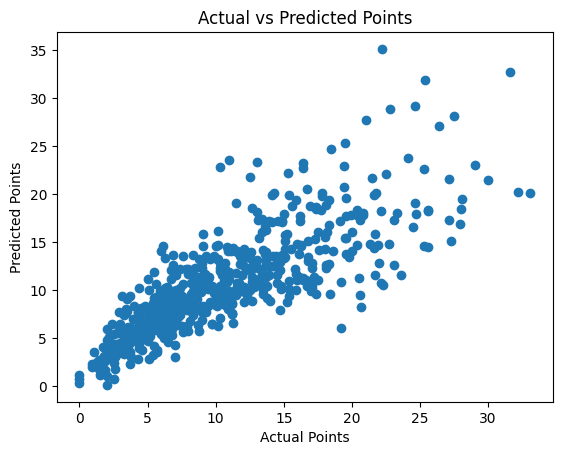

In [7]:
# Preparing the data
X = filtered_all_seasons_df[['Age', 'GP', 'REB', 'AST']] # Features
y = filtered_all_seasons_df['PTS'] # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")



# Plotting actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.show()

Cross-Validated MSE Scores: [16.47227965 17.64401282 15.52673331 14.11823678 14.22645707]
Average Cross-Validated MSE: 15.597543928920425
Test Set MSE: 13.204353120459134
R-squared Score: 0.6852667851166838
R-squared Percentage: 68.52667851166838%


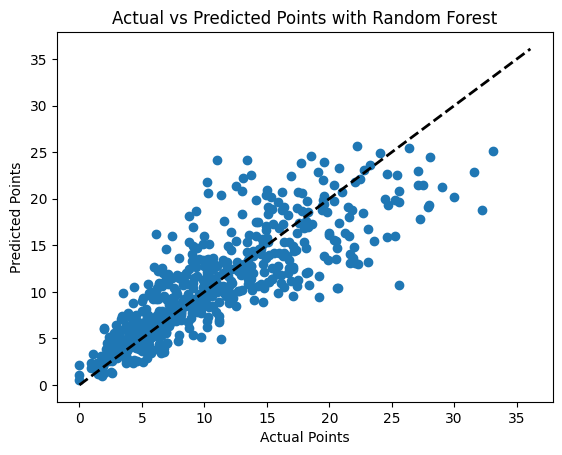

In [8]:
# Initialize the Random Forest Regressor
# Starting with a reasonable number of estimators
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation to evaluate the model's performance
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Train the model on the entire training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Cross-Validated MSE Scores: {-cv_scores}")
print(f"Average Cross-Validated MSE: {-np.mean(cv_scores)}")
print(f"Test Set MSE: {rf_mse}")

# Calculate R-squared score
r_squared = r2_score(y_test, rf_predictions)
print(f"R-squared Score: {r_squared}")

# Convert R-squared score to percentage
r_squared_percentage = r_squared * 100
print(f"R-squared Percentage: {r_squared_percentage}%")

# Plotting the actual vs predicted values for the test set
plt.scatter(y_test, rf_predictions)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points with Random Forest')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()

The scatter plot provided shows the predicted points versus the actual points scored by NBA players, 
with the Random Forest model's predictions. Here's what the plot suggests:

Positive Correlation: There is a clear positive correlation between actual and predicted points, which is 
indicated by the general trend of the data points. As the actual points increase, the predicted points also 
increase, which suggests that the model is capturing the underlying relationship reasonably well.

Data Density: The data points are dense around the lower and middle range of actual points and become more
spread out as the number of actual points increases. This suggests that the model may be more reliable at
predicting average performances rather than exceptional or poor performances.

Model Accuracy: The dashed line represents the line of perfect prediction. Data points that lie
on this line are where the model's prediction was exactly equal to the actual performance. The closer
the data points are to this line, the more accurate the model's predictions are. While there is a spread
around the line, many points are reasonably close, indicating that the model has a good level of predictive accuracy.

Outliers or Variance: There are some points that deviate significantly from the line, especially at the higher
end of actual points. This could mean that the model is less accurate for players with very high points 
scored — potentially star players or players who had an unusually good season.

Mean Squared Error for Rebounds: 3.6162292978723407
R-squared Score for Rebounds: 0.3782323227747134
R-squared Percentage for Rebounds: 37.82323227747134%


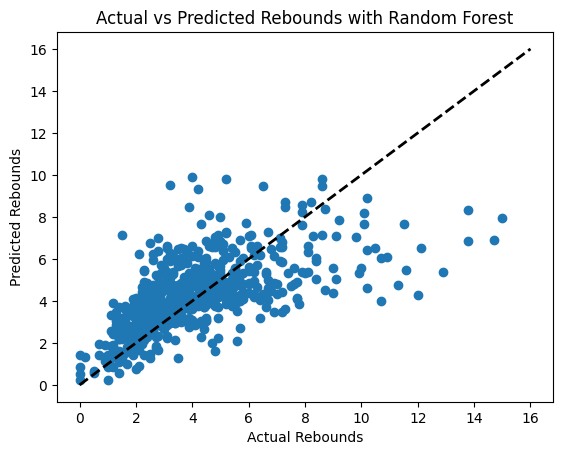

In [9]:
# Define the features and the target for rebounds
X_reb = filtered_all_seasons_df[['Age', 'GP', 'PTS', 'AST']]  # Excluding 'REB' because it's the target
y_reb = filtered_all_seasons_df['REB']

# Split the data into training and testing sets
X_train_reb, X_test_reb, y_train_reb, y_test_reb = train_test_split(X_reb, y_reb, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor for rebounds
rf_model_reb = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model_reb.fit(X_train_reb, y_train_reb)

# Predict on the test set
rf_predictions_reb = rf_model_reb.predict(X_test_reb)

# Evaluate the model using Mean Squared Error
rf_mse_reb = mean_squared_error(y_test_reb, rf_predictions_reb)
print(f"Mean Squared Error for Rebounds: {rf_mse_reb}")

# Calculate R-squared score for rebounds
r_squared_reb = r2_score(y_test_reb, rf_predictions_reb)
print(f"R-squared Score for Rebounds: {r_squared_reb}")

# Convert R-squared score to percentage for rebounds
r_squared_percentage_reb = r_squared_reb * 100
print(f"R-squared Percentage for Rebounds: {r_squared_percentage_reb}%")

# Plotting the actual vs predicted values for rebounds
plt.scatter(y_test_reb, rf_predictions_reb)
plt.xlabel('Actual Rebounds')
plt.ylabel('Predicted Rebounds')
plt.title('Actual vs Predicted Rebounds with Random Forest')
plt.plot([y_reb.min(), y_reb.max()], [y_reb.min(), y_reb.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()

Mean Squared Error for Assists: 2.2835504009574468
R-squared Score for Assists: 0.4747393493993767
R-squared Percentage for Assists: 47.47393493993767%


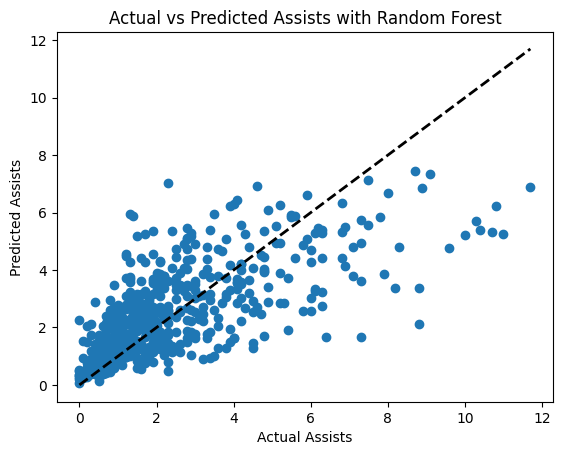

In [10]:
# Define the features and the target for assists
X_ast = filtered_all_seasons_df[['Age', 'GP', 'PTS', 'REB']]  # Excluding 'AST' because it's the target
y_ast = filtered_all_seasons_df['AST']

# Split the data into training and testing sets
X_train_ast, X_test_ast, y_train_ast, y_test_ast = train_test_split(X_ast, y_ast, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor for assists
rf_model_ast = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model_ast.fit(X_train_ast, y_train_ast)

# Predict on the test set
rf_predictions_ast = rf_model_ast.predict(X_test_ast)

# Evaluate the model using Mean Squared Error
rf_mse_ast = mean_squared_error(y_test_ast, rf_predictions_ast)
print(f"Mean Squared Error for Assists: {rf_mse_ast}")

# Calculate R-squared score for rebounds
r_squared_ast = r2_score(y_test_ast, rf_predictions_ast)
print(f"R-squared Score for Assists: {r_squared_ast}")

# Convert R-squared score to percentage for rebounds
r_squared_percentage_ast = r_squared_ast * 100
print(f"R-squared Percentage for Assists: {r_squared_percentage_ast}%")

# Plotting the actual vs predicted values for assists
plt.scatter(y_test_ast, rf_predictions_ast)
plt.xlabel('Actual Assists')
plt.ylabel('Predicted Assists')
plt.title('Actual vs Predicted Assists with Random Forest')
plt.plot([y_ast.min(), y_ast.max()], [y_ast.min(), y_ast.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()